In [27]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
data = pd.read_csv("Fake_Real_Data.csv")
data.shape,data.head(),data.label.value_counts()

((9900, 2),
                                                 Text label
 0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
 1  U.S. conservative leader optimistic of common ...  Real
 2  Trump proposes U.S. tax overhaul, stirs concer...  Real
 3   Court Forces Ohio To Allow Millions Of Illega...  Fake
 4  Democrats say Trump agrees to work on immigrat...  Real,
 Fake    5000
 Real    4900
 Name: label, dtype: int64)

In [29]:
data["label_num"] = data['label'].map({'Fake':0,'Real':1})
data.label_num.value_counts()

0    5000
1    4900
Name: label_num, dtype: int64

In [30]:
X_train,X_test,y_train,y_test= train_test_split(data.Text,data.label_num,random_state = 2022,test_size = 0.2,stratify = data.label_num)
X_train.shape,X_test.shape

((7920,), (1980,))

In [31]:
y_test.value_counts(),y_train.value_counts()

(0    1000
 1     980
 Name: label_num, dtype: int64,
 0    4000
 1    3920
 Name: label_num, dtype: int64)

## Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
print the classification report.

In [32]:
### 1 gram
knn_pipeline = Pipeline([
    
    ("vectorizer",CountVectorizer()),
    ("Knn_model",KNeighborsClassifier(n_neighbors = 10 , metric = "euclidean"))
])

In [33]:
knn_pipeline.fit(X_train,y_train)
y_pred = knn_pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1000
           1       0.93      0.96      0.95       980

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



## Attempt 2:

using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
print the classification report.

In [34]:
### 1 - 3 gram
knn_pipeline1 = Pipeline([
    
    ("vectorizer",CountVectorizer(ngram_range = (1,3))),
    ("Knn_model",KNeighborsClassifier(n_neighbors = 10 , metric = "euclidean"))
])
knn_pipeline1.fit(X_train,y_train)
y_pred = knn_pipeline1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



## Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
print the classification report.

In [35]:
### 1 - 3 gram
knn_pipeline1 = Pipeline([
    
    ("vectorizer",CountVectorizer(ngram_range = (1,3))),
    ("Knn_model",KNeighborsClassifier(n_neighbors = 10 , metric = "cosine"))
])
knn_pipeline1.fit(X_train,y_train)
y_pred = knn_pipeline1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



## Attempt 4 :

using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with  trigrams.
use Random Forest as the classifier.
print the classification report.

In [36]:
### 1 - 3 gram
Random_pipeline1 = Pipeline([
    
    ("vectorizer",CountVectorizer(ngram_range = (3,3))),
    ("RandomF_model",RandomForestClassifier(n_estimators = 100, criterion = "entropy"))
])
Random_pipeline1.fit(X_train,y_train)
y_pred = Random_pipeline1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



## Attempt 5 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with both unigram and bigrams.
use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
print the classification report.

In [37]:
NB_pipeline1 = Pipeline([
    
    ("vectorizer",CountVectorizer(ngram_range = (3,3))),
    ("NB_model",MultinomialNB(alpha = 0.75))
])
NB_pipeline1.fit(X_train,y_train)
y_pred = NB_pipeline1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [49]:
def preprocessing(text):
    doc = nlp(text)
    nlp.vocab['not'].is_stop = "False"
    req_token = []
    for token in doc:
        if not token.is_stop or not token.is_punct:
            req_token.append(token.lemma_)
    return " ".join(req_token)
            

In [50]:
data['preprocessed_txt'] = data['Text'].apply(preprocessing) 

In [51]:
data.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Top Trump Surrogate BRUTALLY Stabs Him in th...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic of common ...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"trump propose U.S. tax overhaul , stir concern..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio to allow million of illega...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats say Trump agree to work on immigrati...


In [52]:
X_train,X_test,y_train,y_test= train_test_split(data.preprocessed_txt,data.label_num,random_state = 2022,test_size = 0.2,stratify = data.label_num)
X_train.shape,X_test.shape,y_test.value_counts(),y_train.value_counts()

((7920,),
 (1980,),
 0    1000
 1     980
 Name: label_num, dtype: int64,
 0    4000
 1    3920
 Name: label_num, dtype: int64)

## Let's check the scores with our best model till now

Random Forest
Attempt1 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [53]:
Random_pipeline1 = Pipeline([
    
    ("vectorizer",CountVectorizer(ngram_range = (3,3))),
    ("RandomF_model",RandomForestClassifier(n_estimators = 100, criterion = "entropy"))
])
Random_pipeline1.fit(X_train,y_train)
y_pred = Random_pipeline1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [54]:
Random_pipeline1 = Pipeline([
    
    ("vectorizer",CountVectorizer(ngram_range = (1,3))),
    ("RandomF_model",RandomForestClassifier(n_estimators = 100, criterion = "entropy"))
])
Random_pipeline1.fit(X_train,y_train)
y_pred = Random_pipeline1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



<AxesSubplot:>

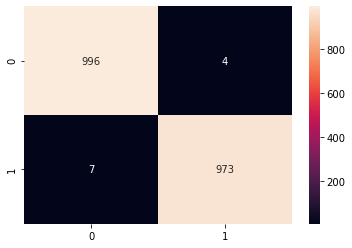

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sm

cm = confusion_matrix(y_test,y_pred)
sm.heatmap(cm,annot = True,fmt = 'd')